# Preprocessing

## Importing Necessary Libraries

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("darkgrid")

from tqdm import tqdm
from preprocessing import preprocess_text


for dirname, _, filenames in os.walk('./dataset'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/batuhanbasak/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package punkt_tab to
[nltk_data]     /Users/batuhanbasak/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/batuhanbasak/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


./dataset/twitter_validation.csv
./dataset/twitter_training.csv


## EDA & Preprocessing

### Loading data frame

In [2]:
column_names = ['id', 'entity', 'sentiment', 'tweet']
df = pd.read_csv('./dataset/twitter_training.csv', names=column_names)
df.head()

,id,entity,sentiment,tweet
0,2401,Borderlands,Positive,im getting on borderlands and i will murder yo...
1,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
2,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
3,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
4,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74682 entries, 0 to 74681
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   id         74682 non-null  int64 
 1   entity     74682 non-null  object
 2   sentiment  74682 non-null  object
 3   tweet      73996 non-null  object
dtypes: int64(1), object(3)
memory usage: 2.3+ MB


### Handling missing values

In [4]:
df.isna().sum()

id             0
entity         0
sentiment      0
tweet        686
dtype: int64

There are 686 samples that their tweets are missing. We will remove them.

In [5]:
df = df.dropna()

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 73996 entries, 0 to 74681
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   id         73996 non-null  int64 
 1   entity     73996 non-null  object
 2   sentiment  73996 non-null  object
 3   tweet      73996 non-null  object
dtypes: int64(1), object(3)
memory usage: 2.8+ MB


### Checking sentiments and their counts

In [7]:
df['sentiment'].value_counts()

sentiment
Negative      22358
Positive      20655
Neutral       18108
Irrelevant    12875
Name: count, dtype: int64

Remove Irrelevant sentiments

In [8]:
df = df.loc[df['sentiment'] != 'Irrelevant']

In [9]:
df['sentiment'].value_counts()

sentiment
Negative    22358
Positive    20655
Neutral     18108
Name: count, dtype: int64

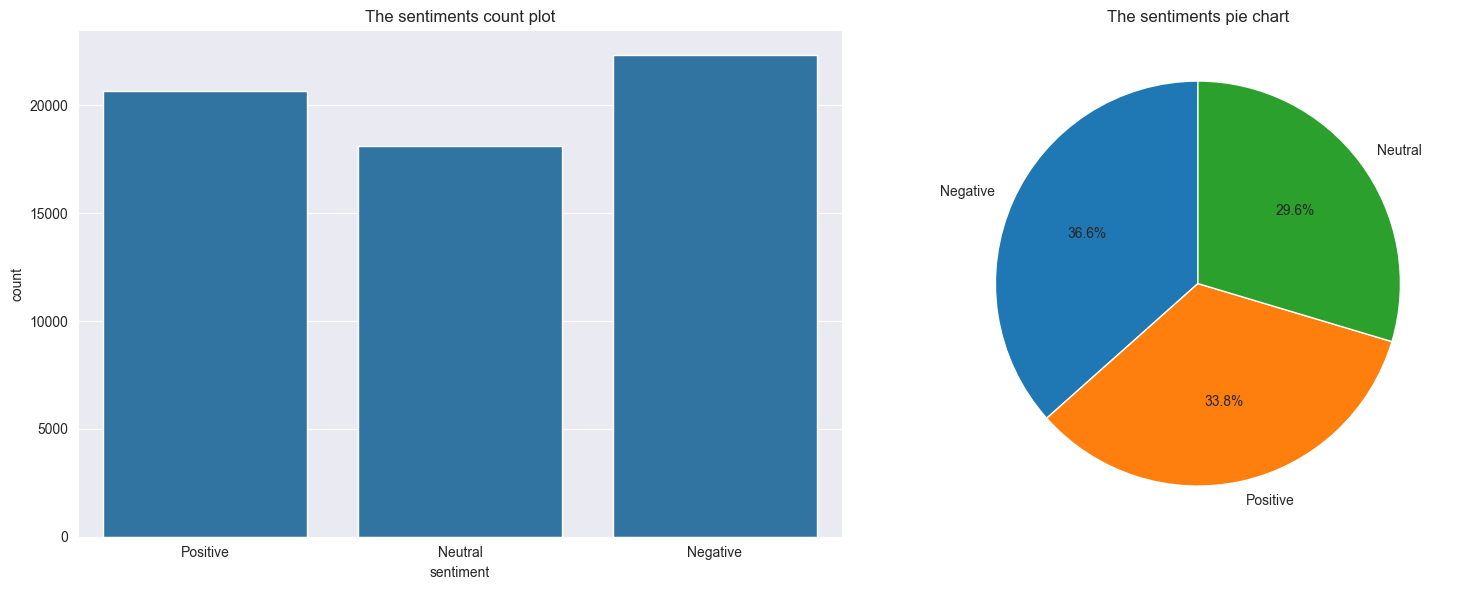

In [10]:
_, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# Bar plot
sns.countplot(data=df, x='sentiment', ax=ax1)
ax1.set_title("The sentiments count plot")

# Data for pie chart
sentiment_counts = df['sentiment'].value_counts()

# Pie chart in ax2
ax2.pie(sentiment_counts, labels=sentiment_counts.index, autopct='%1.1f%%', startangle=90)
ax2.set_title("The sentiments pie chart")

# Show plots
plt.tight_layout()

plt.show()

### Preprocessing tweets

In [11]:
# Preprocess tweets and save in a new column `preprocessed_tweet`
print('\nPreprocessing tweets...')
df['preprocessed_tweet'] = [preprocess_text(text) for text in tqdm(df['tweet'])]


Preprocessing tweets...


100%|██████████| 61121/61121 [02:35<00:00, 392.07it/s]


### Saving updated df to file

In [12]:
df.to_csv('data.csv', index=False, encoding='utf-8')